PREDICTING NUTRIENT GAPS

this notebbok will guide u the process of building a machine learning a model to prediction nutrient gaps in soil

STEP 1
LOAD THE DATA

In [1]:
# Models Used in This Project

from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')


STEP 2 
EXPLORE THE DATA ANAYSIS(EDA)

In [2]:
# Load datasets
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')
train_gap_df = pd.read_csv('Gap_Train.csv')
test_gap_df =pd.read_csv('Gap_Test.csv')
sample_submission_df =pd.read_csv('SampleSubmission.csv')

In [3]:
train_df.head()

,site,PID,lon,lat,pH,alb,bio1,bio12,bio15,bio7,...,P,K,Ca,Mg,S,Fe,Mn,Zn,Cu,B
0,site_id_bIEHwl,ID_I5RGjv,70.603761,46.173798,7.75,176,248,920,108,190,...,0.34,147,6830,2310,5.66,75.2,85.0,0.82,2.98,0.24
1,site_id_nGvnKc,ID_8jWzJ5,70.590479,46.078924,7.10,181,250,1080,113,191,...,11.70,151,1180,235,19.40,96.2,409.0,2.57,4.32,0.10
2,site_id_nGvnKc,ID_UgzkN8,70.582553,46.048820,6.95,188,250,1109,111,191,...,21.80,151,1890,344,11.00,76.7,65.0,1.95,1.24,0.22
3,site_id_nGvnKc,ID_DLLHM9,70.573267,46.021910,7.83,174,250,1149,112,191,...,39.90,201,6660,719,14.90,81.9,73.0,4.90,3.08,0.87
4,site_id_7SA9rO,ID_d009mj,70.585330,46.204336,8.07,188,250,869,114,191,...,1.00,90,7340,1160,8.66,69.4,149.0,0.55,3.03,0.31


In [4]:
test_df.head()

,site,PID,lon,lat,pH,alb,bio1,bio12,bio15,bio7,...,para,parv,ph20,slope,snd20,soc20,tim,wp,xhp20,BulkDensity
0,site_id_hgJpkz,ID_NGS9Bx,69.170794,44.522885,6.86,144,256,910,108,186,...,37.940418,467.619293,6.825,1.056416,25.50,15.25,8.732471,0.016981,0.005831,1.20
1,site_id_olmuI5,ID_YdVKXw,68.885265,44.741057,7.08,129,260,851,110,187,...,35.961353,542.590149,6.725,0.730379,18.75,14.00,10.565657,0.021030,0.005134,1.24
2,site_id_PTZdJz,ID_MZAlfE,68.970210,44.675777,6.50,142,259,901,109,187,...,38.983898,416.385437,6.825,1.146542,21.00,14.00,9.590125,0.018507,0.004480,1.23
3,site_id_DOTgr8,ID_GwCCMN,69.068751,44.647707,6.82,142,261,847,109,187,...,39.948471,374.971008,6.725,0.567210,23.25,12.25,9.669279,0.021688,0.006803,1.22
4,site_id_1rQNvy,ID_K8sowf,68.990002,44.577607,6.52,145,253,1109,110,186,...,33.658615,361.233643,6.200,1.169207,26.25,18.25,7.895920,0.023016,0.000874,1.23


In [5]:
train_gap_df.head()

,Nutrient,Required,Available,Gap,PID
0,N,100.0,3796.0000,-3696.0000,ID_I5RGjv
1,P,40.0,0.9928,39.0072,ID_I5RGjv
2,K,52.0,429.2400,-377.2400,ID_I5RGjv
3,Ca,12.0,19943.6000,-19931.6000,ID_I5RGjv
4,Mg,8.0,6745.2000,-6737.2000,ID_I5RGjv


In [6]:
test_gap_df = pd.merge(test_gap_df, test_df[['PID', 'BulkDensity']], on='PID', how='left')

In [7]:
test_gap_df.head()

,Nutrient,Required,PID,BulkDensity
0,N,100.0,ID_NGS9Bx,1.2
1,P,40.0,ID_NGS9Bx,1.2
2,K,52.0,ID_NGS9Bx,1.2
3,Ca,12.0,ID_NGS9Bx,1.2
4,Mg,8.0,ID_NGS9Bx,1.2


In [8]:
sample_submission_df.head()


,ID,Gap
0,ID_002W8m_B,0
1,ID_002W8m_Ca,0
2,ID_002W8m_Cu,0
3,ID_002W8m_Fe,0
4,ID_002W8m_K,0


FEATURE SELECTION FOR AMINI SOIL PREDICTION

In [9]:
print("Train Data Info:")
print(train_df.info())
print("\nTest Data Info:")
print(test_df.info())



Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7744 entries, 0 to 7743
Data columns (total 44 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site         7744 non-null   object 
 1   PID          7744 non-null   object 
 2   lon          7744 non-null   float64
 3   lat          7744 non-null   float64
 4   pH           7744 non-null   float64
 5   alb          7744 non-null   int64  
 6   bio1         7744 non-null   int64  
 7   bio12        7744 non-null   int64  
 8   bio15        7744 non-null   int64  
 9   bio7         7744 non-null   int64  
 10  bp           7744 non-null   float64
 11  cec20        7744 non-null   float64
 12  dows         7744 non-null   float64
 13  ecec20       7739 non-null   float64
 14  hp20         7739 non-null   float64
 15  ls           7744 non-null   float64
 16  lstd         7744 non-null   float64
 17  lstn         7744 non-null   float64
 18  mb1          7744 non-null   fl

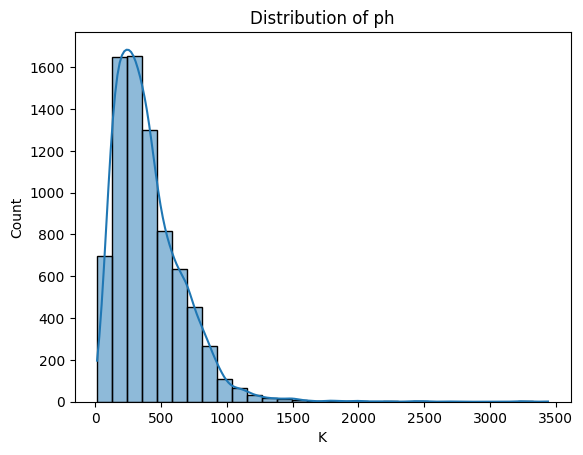

In [10]:
#visualize the ph 
sns.histplot(train_df['K'] , bins=30,kde=True)
plt.title('Distribution of ph')
plt.show()


STEP 4 FEACTURE SELECTION AND PROCESSING

HANDLING MISSING VALUES

In [11]:
#FILLING MISSIG VALUES WITH COLUMN WITH MEAN
for column in train_df.columns:
    if train_df[column].isnull().any():
     train_df[column].fillna(train_df[column].mean(),inplace=True)

#fill missing values with columns mean
for column in test_df.columns:
     if test_df[column].isnull().any():
        test_df[column].fillna(test_df[column].mean(), inplace=True)


SOME COLUMNS ARE INDENTIFIERS OR NOT USEFUL FOR PREDICTION

In [12]:
#DROP NON NUMERIC OR IRRELEVANT COLUMNS 
columns_to_drop = ['N', 'P', 'K', 'Ca', 'Mg', 'S', 'Fe', 'Mn', 'Zn', 'Cu', 'B']

X = train_df.drop(columns=columns_to_drop)
y = train_df[columns_to_drop]

#feature selection
X_test = test_df.drop(columns=['PID',"site"])


STEP 5 MODEL TRAING AND TESTING

In [13]:
X_train,X_val,y_train,y_val = train_test_split(X,y ,random_state=42)


In [14]:
#ENCODE TARGET VARIABLES 
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
train_df.columns = Le.fit_transform(train_df.columns)


In [15]:
X_train =X_train.drop(columns=['PID','site'])
X_val = X_val.drop(columns=["PID",'site'])

WE ARE USING A MULTIOUTPUTREGRESSOR 


In [16]:
#THIS PREDICTION HAS MULTILE TARGET COLMNS NOT JUST ON CLASS
#BUILD  THE MODEL
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [17]:
#prediction
pred = model.predict(X_test)
y_pred = model.predict(X_val)


EVALUATION : CHECKING ACCURACY,CLASSIFICATION REPORT

In [18]:
#calulate the absolute error between the predicted and the actaul values
mae = mean_absolute_error(y_val,y_pred)
#calculate the average suare differnce between the predicted and actual values
mse  = mean_squared_error(y_pred,y_val)

#calculate the root mean square error
rmse = np.sqrt(mse)
print(f'MAE: {mae:.4f}, RMSE: {rmse:.4f}')

MAE: 158.5621, RMSE: 480.1203


PREPARE FOR SUBIMISSION

In [19]:
#make predictions on the test set
test_pred =model.predict(X_test)

In [20]:
#split the predictions
N_pred =  test_pred[:, 0]  # Predictions for N
P_pred =  test_pred[:, 1]  # Predictions for P
K_pred =  test_pred[:, 2]  # Predictions for K
Ca_pred = test_pred[:, 3]  # Predictions for Ca
Mg_pred = test_pred[:, 4]  # Predictions for Mg
S_pred =  test_pred[:, 5]  # Predictions for S
Fe_pred = test_pred[:, 6]  # Predictions for Fe
Mn_pred = test_pred[:, 7]  # Predictions for Mn
Zn_pred = test_pred[:, 8]  # Predictions for Zn
Cu_pred = test_pred[:, 9]  # Predictions for Cu
B_pred =  test_pred[:, 10] 

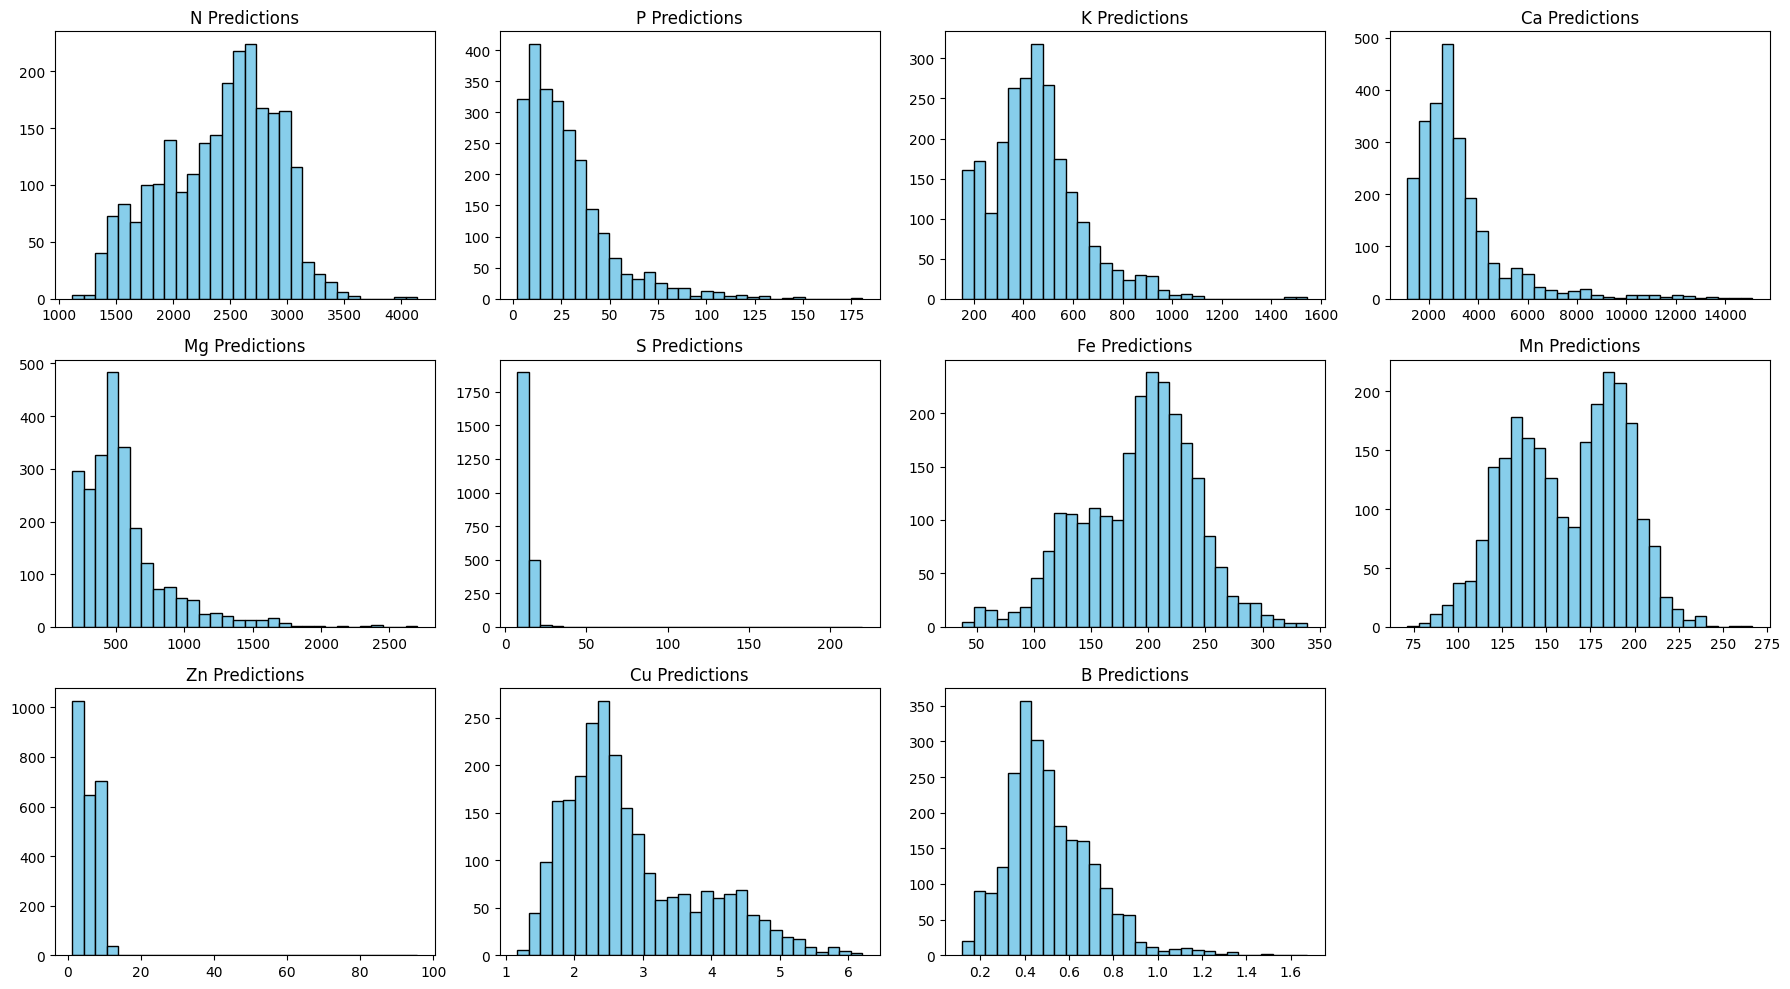

In [21]:
import matplotlib.pyplot as plt

nutrient_names = ['N', 'P', 'K', 'Ca', 'Mg', 'S', 'Fe', 'Mn', 'Zn', 'Cu', 'B']

plt.figure(figsize=(18, 10))
for i in range(11):
    plt.subplot(3, 4, i+1)
    plt.hist(test_pred[:, i], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{nutrient_names[i]} Predictions')
    plt.tight_layout()


CREATE A SUBIMISSON FILE 

In [22]:
#creating ur submiision file
submission = pd.DataFrame({
    'PID':test_df['PID'],
    'N': N_pred,
    'P': P_pred,
    'K': K_pred,
    'Ca': Ca_pred,
    'Mg': Mg_pred,
    'S': S_pred,
    'Fe': Fe_pred,
    'Mn': Mn_pred,
    'Zn': Zn_pred,
    'Cu': Cu_pred,
    'B': B_pred
})

submission.head()


,PID,N,P,K,Ca,Mg,S,Fe,Mn,Zn,Cu,B
0,ID_NGS9Bx,1761.7,7.9631,177.07,5354.61,1717.75,9.6523,120.294,154.650,2.1359,4.7645,0.1940
1,ID_YdVKXw,1365.7,9.3027,195.58,6371.75,2446.27,9.8930,122.586,132.350,1.5506,4.5352,0.1872
2,ID_MZAlfE,1893.6,5.0567,199.65,5452.94,1883.55,8.6638,148.808,177.870,1.6740,4.1507,0.2148
3,ID_GwCCMN,1905.2,5.0351,189.81,5487.88,1708.15,9.5588,137.335,159.950,2.2257,4.5076,0.2122
4,ID_K8sowf,1832.3,7.8470,207.40,5389.13,1394.92,8.6343,132.277,130.692,2.3498,3.8550,0.1984


In [23]:
#turn submission into a 3 column that PID,nutrient and values
submission_melted = submission.melt(id_vars=['PID'] , var_name='Nutrient',value_name='Available_Nutrients_ppm')
submission_melted = submission_melted.sort_values('PID')
submission_melted.head()

,PID,Nutrient,Available_Nutrients_ppm
19869,ID_002W8m,Zn,3.3632
15033,ID_002W8m,Fe,197.1830
2943,ID_002W8m,P,8.0788
24705,ID_002W8m,B,0.4000
525,ID_002W8m,N,2506.4000


CACULATE THE NUTRIENTS GAPS

TRANSFORM THE PREDICTED PM VALUES TO NUTRIENT GAPS TO DETERMINE THE NUTRIENT GAPS

AVALIABLE NUTRIENT ARE CACULATED BY = PM X SOIL DEPTH X BULK DENSITY X 0.1

In [24]:
#merge test_gap.df with subimission_melted on pid and nutrient
nutrient_df = pd.merge(submission_melted,test_gap_df , on=['PID', 'Nutrient'],how='left')

In [ ]:
soil_depth = 20 #cm
#caculate the avialable nutrients _in_kg_ha
nutrient_df['Available_Nutrients_in_kg_ha'] = (nutrient_df['Available_Nutrients_ppm'] * 
                                                soil_depth * nutrient_df['BulkDensity'] * 0.1)

In [26]:
nutrient_df.head()

,PID,Nutrient,Available_Nutrients_ppm,Required,BulkDensity,Available_Nutrients_in_kg_ha
0,ID_002W8m,Zn,3.3632,0.40,1.15,7.73536
1,ID_002W8m,Fe,197.1830,0.80,1.15,453.52090
2,ID_002W8m,P,8.0788,40.00,1.15,18.58124
3,ID_002W8m,B,0.4000,0.08,1.15,0.92000
4,ID_002W8m,N,2506.4000,100.00,1.15,5764.72000


In [27]:
#finding the gap
nutrient_df['Gap'] = nutrient_df['Required'] - nutrient_df['Available_Nutrients_in_kg_ha']

In [28]:
nutrient_df['ID'] = nutrient_df['Nutrient'] + '_' + nutrient_df['PID']
nutrient_df = nutrient_df[['ID','Gap']]
nutrient_df.head()

,ID,Gap
0,Zn_ID_002W8m,-7.33536
1,Fe_ID_002W8m,-452.72090
2,P_ID_002W8m,21.41876
3,B_ID_002W8m,-0.84000
4,N_ID_002W8m,-5664.72000


if negative there is more nutrient in the soil if positive there should be nutrient

In [29]:
nutrient_df.to_csv('submission.csv', index=False)
print("Submission file saved as submission.csv")

Submission file saved as submission.csv


In [30]:
# Save processed train features
X.to_csv("X_processed.csv", index=False)

# Save processed train labels (targets)
y.to_csv("y_processed.csv", index=False)

# Save processed test features
X_test.to_csv("X_test_processed.csv", index=False)
